## Trabajo Practico 1

#### Materia: Vision por Computadora 1
#### Alumno: Lucas Rivela


In [45]:
%matplotlib inline

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#### Parte 1

##### Objetivo

Implementar los algoritmos de Pasaje a Coordenadas Cromaticas y Balanceo de Blancos usando White Patch. 
- El pasaje sera para solucionar las variaciones de contraste
- White Patch para solucionar las diferencias de color de iluminacion

In [89]:
def coordenadas_cromaticas(input_image:np.ndarray) -> np.ndarray: 
    '''
    Argumentos
    img: Imagen de entrada
    ---------------------------------------
    Retorno
    Imagen: (numpy.ndarray) con las nuevas coordenadas
    '''
    # Agarro los canales
    canal_r, canal_g, canal_b = cv.split(input_image)

    b = (canal_r + canal_g + canal_b)

    # Genero nueva matriz
    img_new = np.zeros(input_image.shape)
    img_new[:,:,0] = np.divide(canal_r,  b, where=b!= 0 )
    img_new[:,:,1] = np.divide(canal_g, b, where=b!= 0 )
    img_new[:,:,2] = np.divide(canal_b, b, where=b!=0 )

    img_new = np.clip(img_new.astype(int), 0, 255)

    return img_new

In [14]:
def white_patch(input_image: np.ndarray) -> np.ndarray:
    '''
    Argumentos
    img: Imagen de entrada
    ---------------------------------------
    Retorno
    Imagen: (numpy.ndarray) con el balance aplicado
    '''
    # Agarro los canales
    canal_r, canal_g, canal_b = cv.split(input_image)

    # Agarro los maximos
    max_r = canal_r.max()
    max_g = canal_g.max()
    max_b = canal_b.max()

    new_image = np.zeros(input_image.shape)
    new_image[:,:,0] = (float(255)/max_r) * canal_r
    new_image[:,:,1] = (float(255)/max_g) * canal_g
    new_image[:,:,2] = (float(255)/max_b) * canal_b

    return new_image.astype(int)

Text(0.5, 1.0, 'Coordenadas Cromaticas')

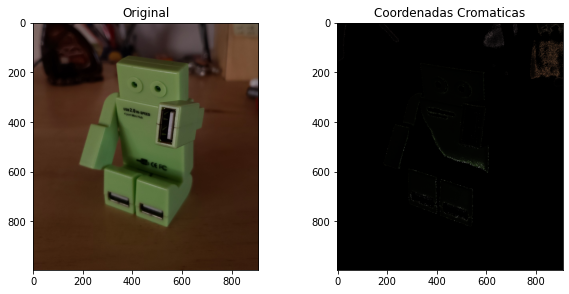

In [90]:
img = cv.imread('coord_cromaticas/CoordCrom_2.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgNew = coordenadas_cromaticas(img)

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(221)
ax1.imshow(img)
ax1.set_title('Original')

ax2 = plt.subplot(222)
ax2.imshow(imgNew)
ax2.set_title('Coordenadas Cromaticas')


Text(0.5, 1.0, 'White Patch')

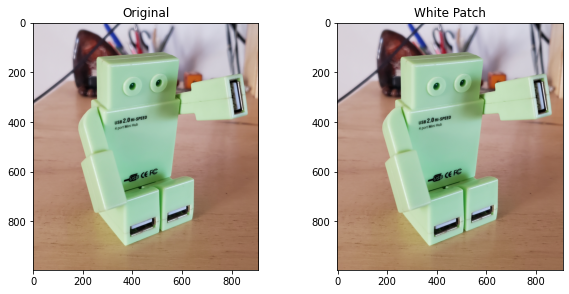

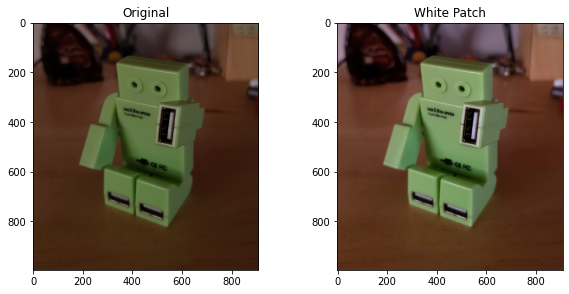

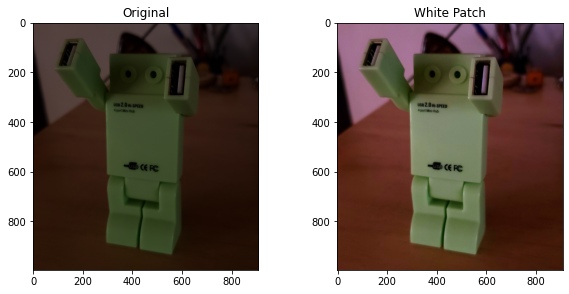

In [34]:
CoorCrom1 = cv.imread('coord_cromaticas/CoordCrom_1.png')
CoorCrom1 = cv.cvtColor(CoorCrom1, cv.COLOR_BGR2RGB)
CoorCrom2 = cv.imread('coord_cromaticas/CoordCrom_2.png')
CoorCrom2 = cv.cvtColor(CoorCrom2, cv.COLOR_BGR2RGB)
CoorCrom3 = cv.imread('coord_cromaticas/CoordCrom_3.png')
CoorCrom3 = cv.cvtColor(CoorCrom3, cv.COLOR_BGR2RGB)

CoorCrom1New2 = white_patch(CoorCrom1)
CoorCrom2New2 = white_patch(CoorCrom2)
CoorCrom3New2 = white_patch(CoorCrom3)

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(221)
ax1.imshow(CoorCrom1)
ax1.set_title('Original')

ax2 = plt.subplot(222)
ax2.imshow(CoorCrom1New2)
ax2.set_title('White Patch')

ax1 = plt.subplot(221)
ax1.imshow(CoorCrom2)
ax1.set_title('Original')

ax2 = plt.subplot(222)
ax2.imshow(CoorCrom2New2)
ax2.set_title('White Patch')

ax1 = plt.subplot(221)
ax1.imshow(CoorCrom3)
ax1.set_title('Original')

ax2 = plt.subplot(222)
ax2.imshow(CoorCrom3New2)
ax2.set_title('White Patch')


#### Parte 2

##### Objetivo

- Cargar dos imagenes en escala de grises y realizar un analisis de sus histogramas.
- Cargar una imagen a color y analizar su histograma. Segmentar aplicando mascaras.

Text(0.5, 1.0, 'Histograma Imagen 2')

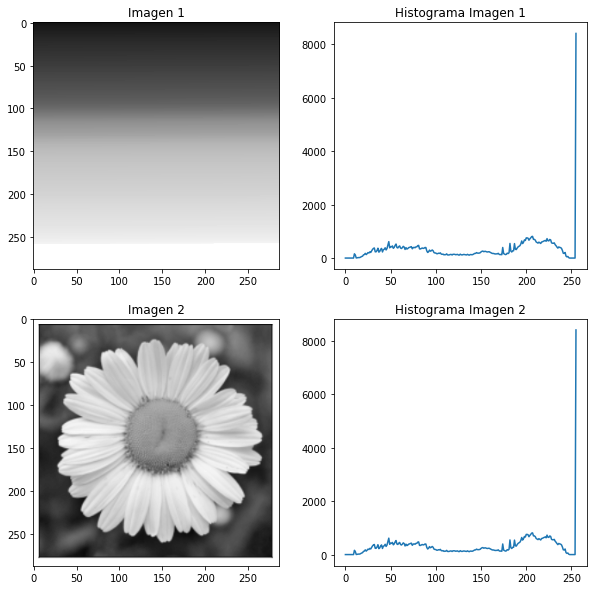

In [72]:
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(221)
ax1.imshow(img1, cmap='gray')
ax1.set_title('Imagen 1')

ax2=plt.subplot(222)
hist1,bins1 = np.histogram(img1.ravel(),256,[0,256])
ax2.plot(hist1)
ax2.set_title('Histograma Imagen 1')

ax1 = plt.subplot(223)
ax1.imshow(img2, cmap='gray')
ax1.set_title('Imagen 2')

ax2=plt.subplot(224)
hist2,bins2 = np.histogram(img2.ravel(),256,[0,256])
ax2.plot(hist2)
ax2.set_title('Histograma Imagen 2')

Text(0.5, 1.0, 'Histograma Imagen 2')

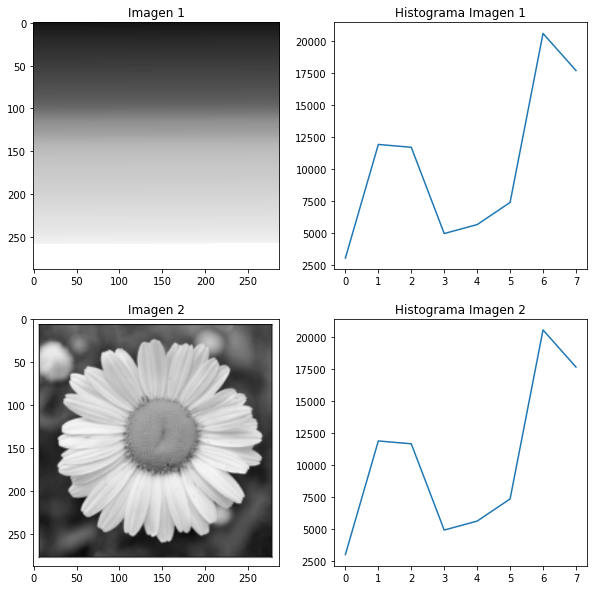

In [74]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(221)
ax1.imshow(img1, cmap='gray')
ax1.set_title('Imagen 1')

ax2=plt.subplot(222)
hist1,bins1 = np.histogram(img1.ravel(),8,[0,256])
ax2.plot(hist1)
ax2.set_title('Histograma Imagen 1')

ax1 = plt.subplot(223)
ax1.imshow(img2, cmap='gray')
ax1.set_title('Imagen 2')

ax2=plt.subplot(224)
hist2,bins2 = np.histogram(img2.ravel(),8,[0,256])
ax2.plot(hist2)
ax2.set_title('Histograma Imagen 2')

In [2]:
seg = cv.imread('segmentacion.png')
seg = cv.cvtColor(seg, cv.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Segmentacion')

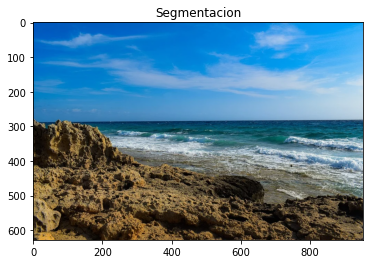

In [3]:
plt.imshow(seg)
plt.title('Segmentacion')

In [4]:
r, g, b = cv.split(seg)

hist_r,bins_r = np.histogram(r.ravel(), 256, [0,256])
hist_g,bins_g = np.histogram(g.ravel(), 256, [0,256])
hist_b,bins_b = np.histogram(b.ravel(), 256, [0,256])

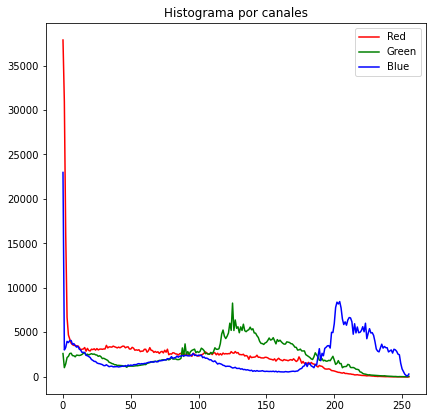

In [5]:
fig = plt.figure(figsize=(15,15))
ax1=plt.subplot(221)
ax1.plot(hist_r, c='red', label='Red')
ax1.plot(hist_g, c='green', label='Green')
ax1.plot(hist_b, c='blue', label='Blue')
ax1.set_title('Histograma por canales')
ax1.legend()

In [32]:
img_HSV = cv.cvtColor(seg, cv.COLOR_RGB2HSV)

In [7]:
img_muestra_hsv = img_HSV[200:800,550:600,:]
color_mean = cv.mean(img_muestra_hsv)
print(color_mean)

(58.85948598130841, 128.3917289719626, 112.27289719626168, 0.0)


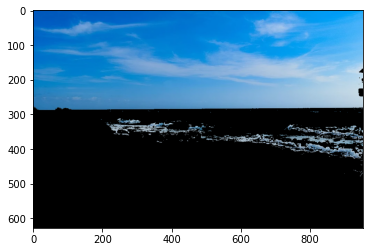

: 

In [46]:
color_l = (100,35,150)
color_u = (110,255,255)
mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(seg, seg, mask=mask)
plt.imshow(img_segmentada)

#### Conclusiones